In [1]:
# 리스트 7-1-(1)
import numpy as np

# 데이터 생성
np.random.seed(seed = 1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 #  분포의 수, 클래스의 수
T = np.zeros((N, 3), dtype = np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율

for n in range(N):
    wk = np.random.rand()
    
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]

In [2]:
# 리스트 7-1-(2)
# 2분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:,:]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:,:]

# 데이터를 'class_data.npz' 에 저장
np.savez('class_data.npz', X_train = X_train, T_train = T_train, X_test = X_test, T_test = T_test, X_range0 = X_range0, X_range1 = X_range1)

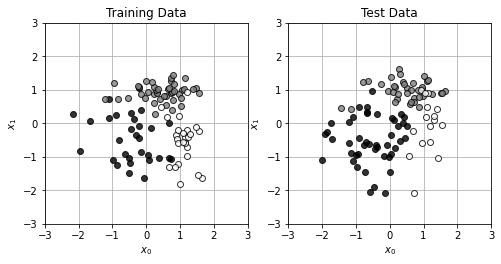

In [3]:
#리스트 7-1-(3)
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 그리기
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [0.5, 0.5, 0.5], [1, 1, 1]] # 컬러 값 설정
    #c = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # 컬러 값 설정 [r, g, b]
    
    for i in range(n):
         plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'none', markeredgecolor = 'black', marker = 'o', color = c[i], alpha = 0.8)
        # K 값을 0, 1, 2로 바꾸어 주면서 부류벡터 t 에 접근 부류번호가 일치하는 인덱스드을 모두 찾아준다
        # 따라서, 부류가 0번인 샘플들의 (x1, x2) 위치에 포인트를 먼저 다 찍고, 그 다음 부류로 순차적으로 찍게 된다
    plt.grid(True)
    
        
# 메인
plt.figure(1, figsize = (8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training Data')

plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Test Data')

plt.show()  

In [4]:
# 리스트 7-1-(4)
# 시그모이드 함수

def Sigmoid(x):
    y = 1 / (1+ np.exp(-x))
    return y

# 네트워크
def FNN(wv, M, K, x): #Feed-forward Neural Network
    #wv : 전체 가중치를 1차원 행벡터로 모아 표현해둔 벡터
    #M : 은닉층 출력의 수
    #K : 출력층 출력의 수
    N, D = x.shape # 입력의 차원 N= 샘플 수, D=특징벡터의 길이(차원 수)
    w = wv[:M * (D+1)] #입력층과 은닉층 사이의 가중치를 가져온다
    w = w.reshape(M, (D+1)) # M * (D+1) 행렬로 변환
    v = wv[M * (D + 1): ] #은닉층과 출력층 사이의 가중치를 가져온다
    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1)) # 은닉층 뉴런의 입력 총합
    z = np.zeros((N, M + 1)) # 은닉층 뉴런의 출력
    a = np.zeros((N, K)) #출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) #출력층 뉴런의 출력

    for n in range(N):
        #은닉층의 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1])
            # (a) np.r_[x[n, :], 1]) 더미 입력(바이어스)를
            # 입력 벡터의 3번째 요소로 덧붙이는 부분
            z[n, m] = Sigmoid(b[n, m])

        #출력층의 계산
        z[n, M] = 1 #더미 뉴런(바이어스)
        wkz = 0

        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])

        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz #최종 출력 값 계산

    return y, a, z, b

WV = np.ones(15) #16개의 매개변수를 모두 1로 초기화
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])
# 현재 모델에 대한 입력데이터 2개에 대한 출력 y

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

In [5]:
# 리스트 7-1-(5)
# 평균 교차 엔트로피 오차
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y,a,z,b=FNN(wv,M,K,x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    # N * K 행렬인 y와 t 행렬을 reshape(-1) 을통하여
    # 1차원 행백터로 변환 시킨 후 내적을 구하면
    # 교차엔트로피오차를 쉽게 구할 수 있다.
    return ce

#test
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

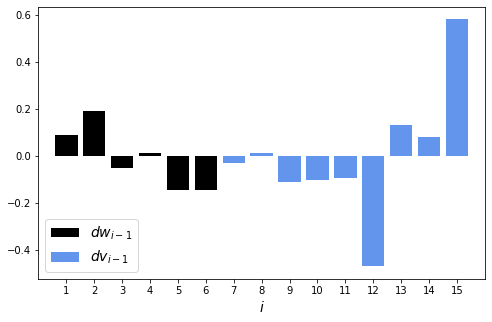

In [6]:
# 리스트 7-1-(6)
# 수치 미분 (근사적인 기울기)

def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)

    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv

# dVW 의 표시
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[ : M * 3], align = "center", color = 'black', label = '$dw_{i-1}$')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3 : ], align = "center", color = 'cornflowerblue', label = '$dv_{i-1}$')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N +1)
    plt.legend(loc = "lower left", fontsize = 14)
    plt.xlabel('$i$', fontsize=14)
    
    
# 메인
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[: 2, :], T_train[:2, :])
plt.figure(1, figsize = (8, 5))
Show_WV(dWV, M)
plt.show()

In [7]:
# 리스트 7-1-(7)
# 수치 미분법에 의한 경사 하강법
import time
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001

    for i in range(n):
        # for 루프 내에서는 wvt 를 dCE_FNN_num으로 갱신하여,
        # 매번 훈련 데이터의 오차와 테스트 데이터의 오차를 계산
        wvt = wvt -alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt

    return wvt, wv_hist, err_train, err_test

# 메인
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * ( M + 1 ))
N_step = 1000 # (B) 학습 단계
alpha = 0.5 # 학습률
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time()- startTime
print("Calculation time : {0: .3f} sec" .format(calculation_time))

Calculation time :  139.644 sec


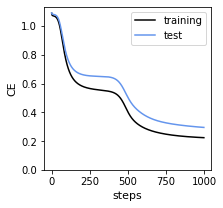

In [8]:
# 리스트 7-1-(8)
# 학습 오차의 표시
plt.figure(1, figsize = (3, 3))
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.xlabel('steps', fontsize = 11)
plt.ylabel('CE', fontsize = 11)
plt.ylim(0, )
plt.legend()
plt.show()

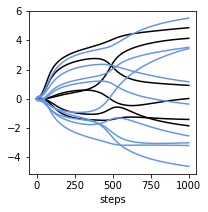

Black: w, Cornflowerblue: v


In [9]:
# 리스트 7-1-(9)
# 가중치의 시간 변화의 표시
plt.figure(1, figsize = (3, 3))
plt.plot(WV_hist[:, : M * 3], 'black')
plt.plot(WV_hist[:, M * 3 :], 'cornflowerblue')
plt.xlabel("steps")
plt.show()
print("Black: w, Cornflowerblue: v")

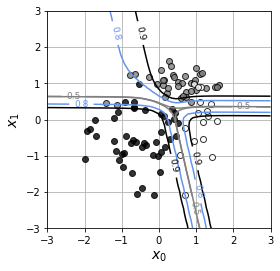

In [10]:
# 리스트 7-1-(10)
# 경계선 표시 함수
# 각각의 카테고리에서 0.5, 0.8, 0.9 이상의 출력을 얻을 수 있는 영역을 등고선으로 표시
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx1, (xn * xn, 1)), np.reshape(xx0, (xn * xn, 1))] # np.c_ column 추가
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize = (5, 5))
    
    for ic in range(K):
        f = y[: , ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.8, 0.9], colors = ['gray', 'cornflowerblue', 'black'])
        cont.clabel(fmt = '%1.1f', fontsize = 9)
        
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    
    
# 경계선 표시
plt.figure(1, figsize = (4, 4))
Show_data(X_test,T_test)
show_FNN(WV, M, K)
plt.xlabel('$x_0$', fontsize = 14)
plt.ylabel('$x_1$', fontsize = 14)
plt.show()